In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_excel("Actual_generation_201901010000_202409290000_Hour.xlsx")
df = df.drop(index=range(0, 8))

C:\Users\asus\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [18]:
df = df.reset_index(drop=True)
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header 

In [41]:
df.replace('-', np.nan, inplace=True)
df['Start date'] = pd.to_datetime(df['Start date'])
df['End date'] = pd.to_datetime(df['End date'])
df

,Start date,End date,Biomass [MWh],Hydropower [MWh],Wind offshore [MWh],Wind onshore [MWh],Photovoltaics [MWh],Other renewable [MWh],Nuclear [MWh],Lignite [MWh],Hard coal [MWh],Fossil gas [MWh],Hydro pumped storage [MWh],Other conventional [MWh]
1,2019-01-01 00:00:00,2019-01-01 01:00:00,4815.25,1554.25,3134.00,20391.75,0.00,126.0,9001.50,6335.00,2811.75,3273.25,275.50,1724.25
2,2019-01-01 01:00:00,2019-01-01 02:00:00,4808.75,1550.75,2868.25,22365.50,0.00,126.0,8535.25,5379.50,2404.25,2967.25,62.50,1682.25
3,2019-01-01 02:00:00,2019-01-01 03:00:00,4766.25,1510.00,2460.25,23213.25,0.00,126.0,7954.00,5341.00,2228.50,2720.25,150.75,1625.25
4,2019-01-01 03:00:00,2019-01-01 04:00:00,4750.25,1494.25,2696.50,24493.50,0.00,126.0,7221.75,5270.75,2356.75,2653.25,41.00,1615.25
5,2019-01-01 04:00:00,2019-01-01 05:00:00,4755.50,1457.00,2578.00,26399.00,0.00,125.0,7120.00,5178.75,2308.50,2706.00,3.50,1621.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50347,2024-09-28 19:00:00,2024-09-28 20:00:00,4313.50,2225.75,6768.50,12704.50,12.75,99.0,NaN,6630.00,1349.25,2933.50,6216.25,1340.50
50348,2024-09-28 20:00:00,2024-09-28 21:00:00,4234.25,2147.50,6377.50,12712.00,0.00,99.0,NaN,6951.00,1246.00,2493.25,4804.50,1339.00
50349,2024-09-28 21:00:00,2024-09-28 22:00:00,4147.25,2150.25,5799.50,12837.00,0.00,99.0,NaN,6832.75,1369.25,2534.75,4652.00,1357.00
50350,2024-09-28 22:00:00,2024-09-28 23:00:00,4085.00,2169.25,5559.75,13016.75,0.00,99.0,NaN,6770.00,1404.75,2500.25,3737.25,1358.50


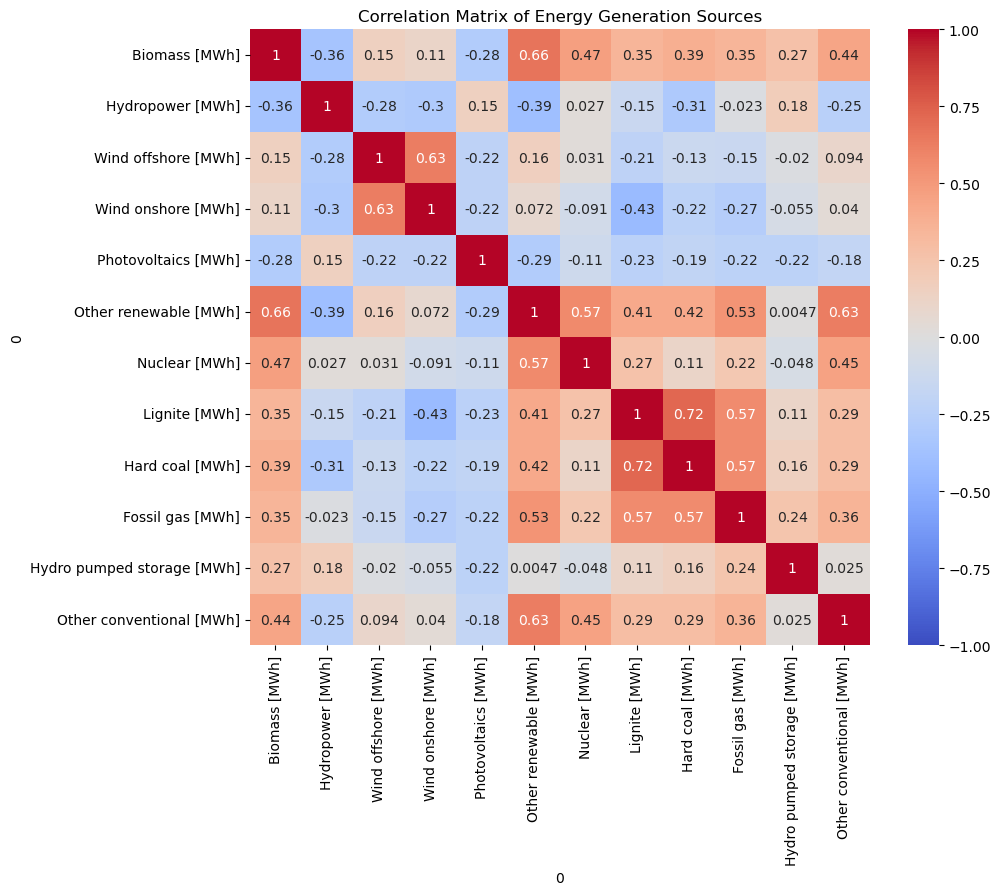

In [42]:
cols_to_convert = df.columns[2:]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
corr_matrix = df[cols_to_convert].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Energy Generation Sources')
plt.show()

In [43]:
renewable_sources = ['Biomass [MWh]', 'Hydropower [MWh]', 'Wind offshore [MWh]', 'Wind onshore [MWh]', 'Photovoltaics [MWh]', 'Other renewable [MWh]']
non_renewable_sources = ['Nuclear [MWh]', 'Lignite [MWh]', 'Hard coal [MWh]', 'Fossil gas [MWh]', 'Hydro pumped storage [MWh]', 'Other conventional [MWh]']

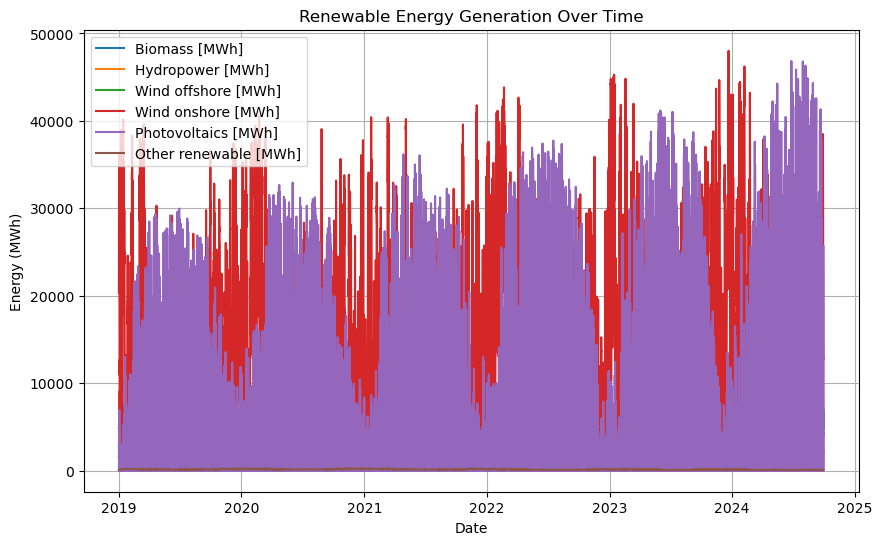

In [44]:
plt.figure(figsize=(10, 6))
for source in renewable_sources:
    plt.plot(df['Start date'], df[source], label=source)
plt.title('Renewable Energy Generation Over Time')
plt.xlabel('Date')
plt.ylabel('Energy (MWh)')
plt.legend()
plt.grid(True)
plt.show()

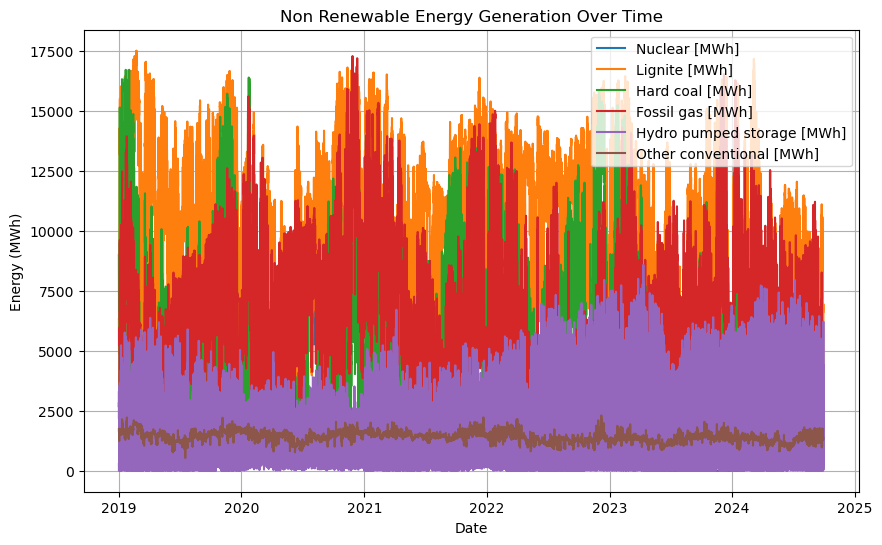

In [45]:
plt.figure(figsize=(10, 6))
for source in non_renewable_sources:
    plt.plot(df['Start date'], df[source], label=source)
plt.title('Non Renewable Energy Generation Over Time')
plt.xlabel('Date')
plt.ylabel('Energy (MWh)')
plt.legend()
plt.grid(True)
plt.show()

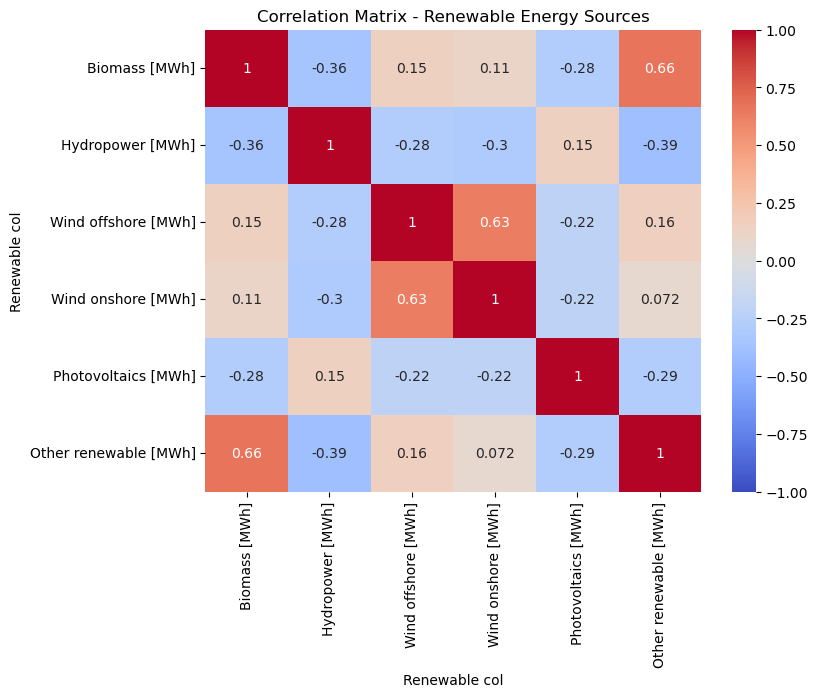

In [46]:
renewable_df = df[renewable_sources]
non_renewable_df = df[non_renewable_sources]

plt.figure(figsize=(8, 6))
sns.heatmap(renewable_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Renewable Energy Sources')
plt.xlabel('Renewable col')
plt.ylabel('Renewable col')
plt.show()

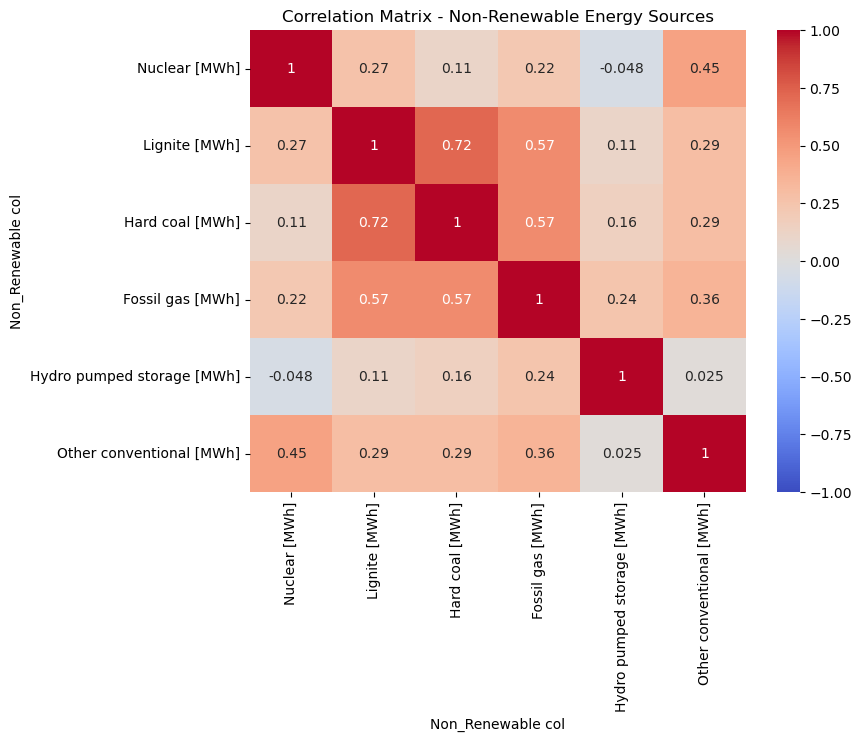

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(non_renewable_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Non-Renewable Energy Sources')
plt.xlabel('Non_Renewable col')
plt.ylabel('Non_Renewable col')
plt.show()